In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

datos = pd.read_csv('iris.csv')
df = pd.DataFrame(datos)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [25]:
## HACEMOS UNA LIMPIEZA DEL DATAFRAME PARA VALORES QUE NO INFLUYEN
df = df.drop(['Id'], axis=1)

In [29]:
## OBSERVAMOS DISTRIBUCION DEL TARGET
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

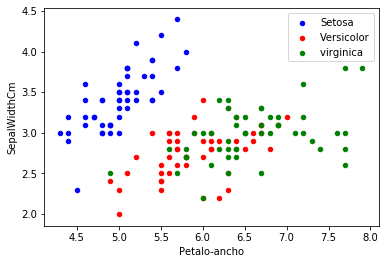

In [31]:
## GRAFICAMOS LAS COMPARACIONES DE LAS CARACTERISTICAS PARA CADA TIPO DE FLOR
## COMENZAREMOS CON LOS DATOS DE LA LONGITUD Y EL ANCHO  DE LOS SEPALOS 

fig = df[df['Species']=='Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Setosa')
df[df['Species']=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm', y='SepalWidthCm', color='red', label='Versicolor', ax = fig)
df[df['Species']=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm', y='SepalWidthCm', color='green', label='virginica ', ax = fig)
fig.set_xlabel('Petalo-longitud')
fig.set_xlabel('Petalo-ancho')
plt.show()

In [40]:
X = df.loc[:,['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y = df['Species']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(X_train,Y_train)
Predic = model.predict(X_test)

In [41]:
model.score(X_test,Y_test)

0.9333333333333333

In [42]:
from sklearn.metrics import classification_report
reporte = classification_report(Y_test, Predic)
print(reporte)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [43]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(Y_test, Predic)
print(matriz)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


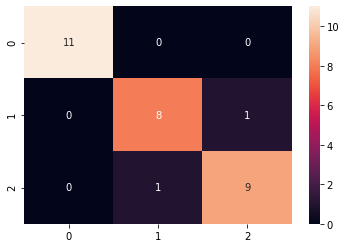

In [45]:
import seaborn as sns
sns.heatmap(matriz, annot=True)